In [23]:
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv("insurance.csv")
df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [25]:
# No. of rows and columns
df.shape

(1338, 7)

In [39]:
X = df.drop(columns = ['charges','gender','region','smoker'])          # Features of datasets

In [40]:
y = df['charges']                         # Target variables of datasets

In [41]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [42]:
X_train

,age,bmi,children
1273,35,27.610,1
590,58,29.000,0
139,22,36.000,0
915,24,33.990,0
969,39,34.320,5
...,...,...,...
534,64,40.480,0
445,45,33.100,0
200,19,32.110,0
318,44,27.645,0


In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [44]:
lr.fit(X_train,y_train)

LinearRegression()

In [45]:
# Intercept
c = lr.intercept_
c

-6322.526454445264

In [46]:
# Slope of the line
m = lr.coef_
m

array([221.00819066, 342.8683826 , 570.06989068])

Training is done now

In [47]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([11449.42615289, 16439.13169922, 10882.91551364, ...,
        8886.13293335, 12880.43037155,  8884.27667532])

Text(0, 0.5, 'Predicted Ptrices')

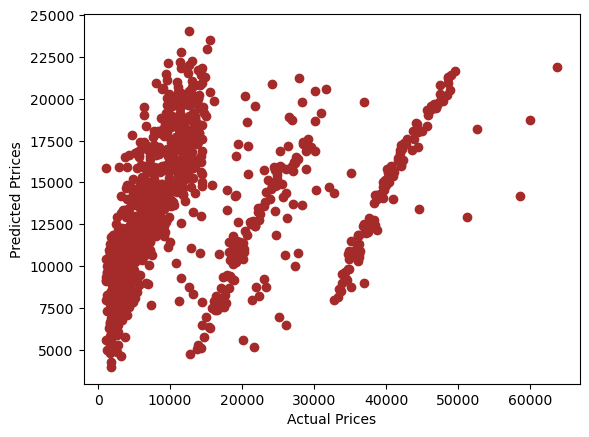

In [48]:
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred_train,c='brown')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Ptrices")

In [49]:
# Prediction on test set
predictions = lr.predict(x_test)
predictions

array([ 8248.39774171, 22921.21776033, 14732.58971126, 15713.66988927,
       10074.89280815, 14364.96543095, 15178.80656093, 11973.52080253,
       11817.30008361, 12080.11653041, 11038.17154024, 12402.39011301,
       17194.19725186, 14851.49249807,  7329.65239246,  8032.24874456,
        9412.29398452,  9928.45281645,  9166.11017125, 13048.05566102,
       20852.14898746, 10651.77453614, 17901.89109935,  8632.46720909,
       18259.62691814, 13162.19564009, 20173.72349664, 14683.50968764,
        7673.95128474, 17256.63448983, 17084.43383908, 15110.50004305,
       21581.69218295,  8909.38463265, 18584.92010982, 12064.06893331,
       13592.36489266, 10247.58210956, 14984.60932099, 19046.07275934,
       11892.39041668, 16060.68788479, 12506.1817004 , 15909.54196422,
        8727.76077564,  8962.85257108, 15338.61525176,  6345.47821829,
       11761.22623755, 15930.58534587, 20175.16535484, 11459.50206087,
       10101.51631241, 13076.15520531, 16640.70311585, 15540.1866684 ,
      

In [50]:
# Evaluation of model using mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predictions)
mse

121839436.852816

In [51]:
data = {
    'data_point_' + str(i): {'Age': row[0], 'bmi': row[1], 'children': row[2]} for i, row in enumerate([
        [60, 36.955, 0],
        [39, 26.41, 0],
        [29, 22.895, 0],
        [58, 39.05, 0],
        [62, 25.0, 0],
        [45, 28.335, 3],
        [31, 18.7, 2],
        [55, 33.21, 1],
        [27, 20.5, 1],
        [33, 24.8, 2],
        [49, 31.75, 3],
        [37, 27.1, 4],
        [42, 35.6, 1],
        [51, 29.9, 2],
        [23, 19.45, 4],
        [56, 38.2, 0],
        [30, 22.7, 3],
        [44, 34.9, 2],
        [48, 30.5, 1],
        [26, 21.3, 4]
    ])
}

a = {key: {col: data[col][key] for col in data} for key in data['data_point_0']}

df0 = pd.DataFrame(a)
df0 = df0.reset_index(drop=True)

df0

,Age,bmi,children
0,60,36.955,0
1,39,26.410,0
2,29,22.895,0
3,58,39.050,0
4,62,25.000,0
5,45,28.335,3
6,31,18.700,2
7,55,33.210,1
8,27,20.500,1
9,33,24.800,2


Mean Squared Error: 9.261633173503307e-27


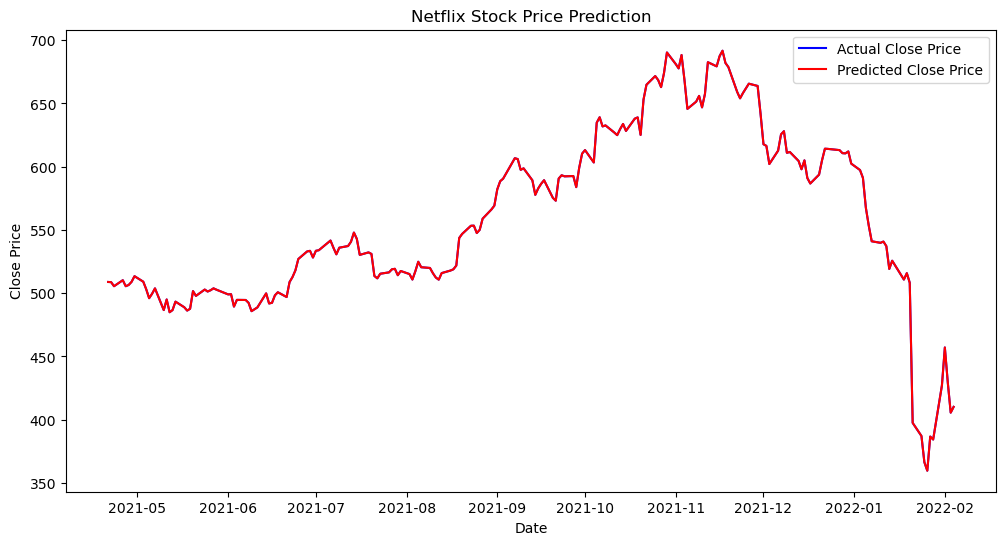

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv("NFLX.csv")

# Parse dates and set 'Date' as the index
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.set_index('Date', inplace=True)

# Fetch day, month, and year from the 'Date' column
data['Day'] = data.index.day
data['Month'] = data.index.month
data['Year'] = data.index.year

# Select features and target variable
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Day', 'Month', 'Year']
target = 'Close'

train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Prepare the training data
X_train = train_data[features]
y_train = train_data[target]

# Prepare the testing data
X_test = test_data[features]
y_test = test_data[target]

# Train a linear regression model
model = LinearRegression() 
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Sort test data by index
test_data = test_data.sort_index()

# Plot the actual vs. predicted closing prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label='Actual Close Price', color='blue')
plt.plot(test_data.index, predictions, label='Predicted Close Price', color='red')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()